<a href="https://colab.research.google.com/github/AbhiramPollur/ExploratoryDataAnalysis/blob/main/21BDS0383.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv"
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())


Dataset Head:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   01/05/19   
1  Electronic accessories       15.28         5   3.8200   80.2200   03/08/19   
2      Home and lifestyle       46.33         7  16.2155  340.5255   03/03/19   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   02/08/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415   

In [4]:
# Explore Dimensions
print("\nDataset Dimensions:", df.shape)



Dataset Dimensions: (1000, 17)


In [5]:
# Summary of the dataset
print("\nSummary of Dataset:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())



Summary of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   998 non-null    object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  999 non-null    object 
 13  cogs                     1000 non-null   float64
 14  gros

In [6]:
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     2
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    1
cogs                       0
gross margin percentage    1
gross income               0
Rating                     1
dtype: int64


In [7]:
# Data Cleaning (if required)
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset shape: {df.shape}")



Number of Duplicate Rows: 0



Univariate Analysis:


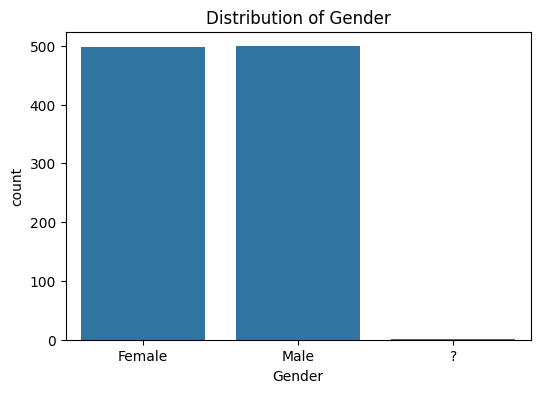

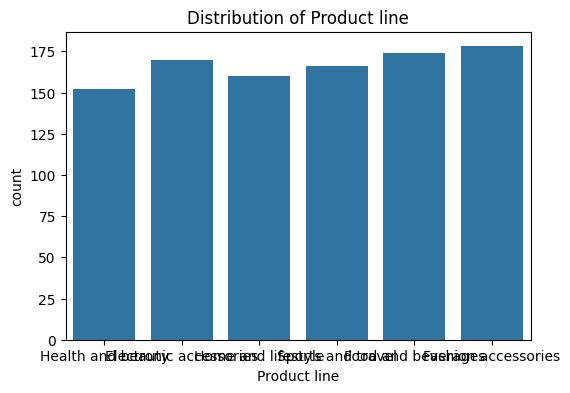

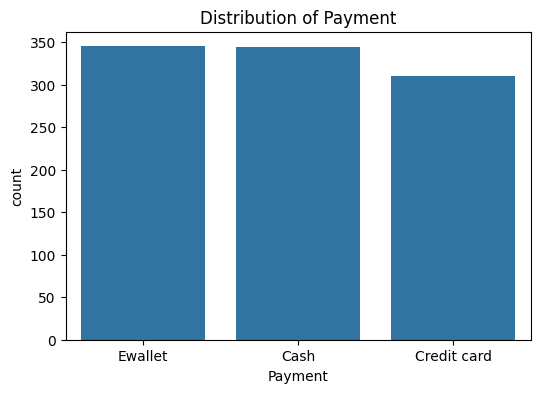

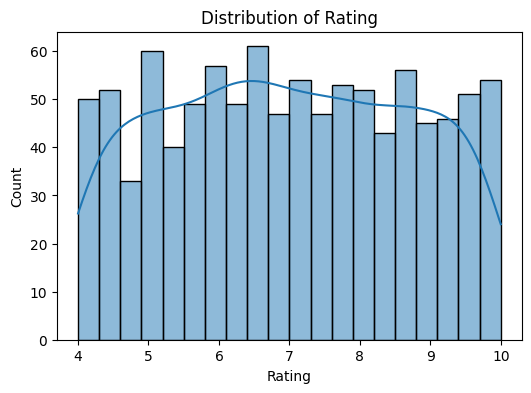

In [8]:
# Univariate Analysis
print("\nUnivariate Analysis:")
columns_to_analyze = ['Gender', 'Product line', 'Payment', 'Rating']
for col in columns_to_analyze:
    plt.figure(figsize=(6, 4))
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col)
    else:
        sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()



Bivariate Analysis:


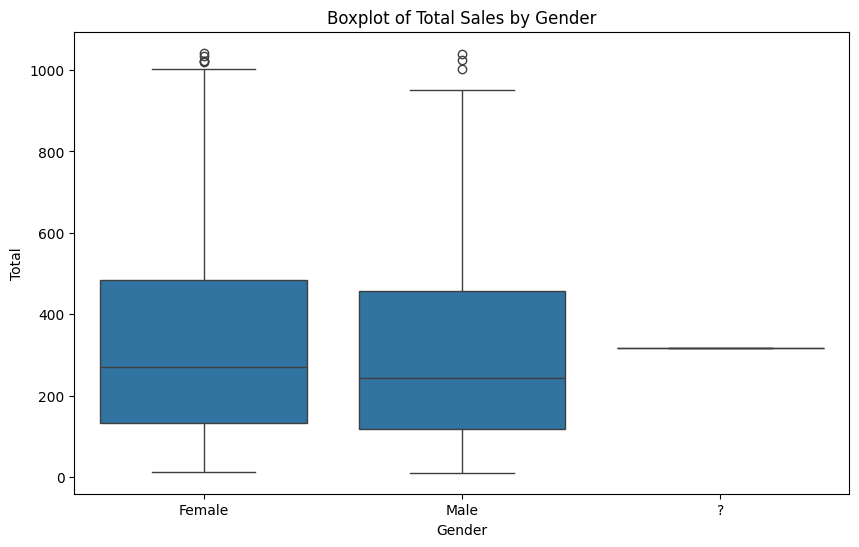

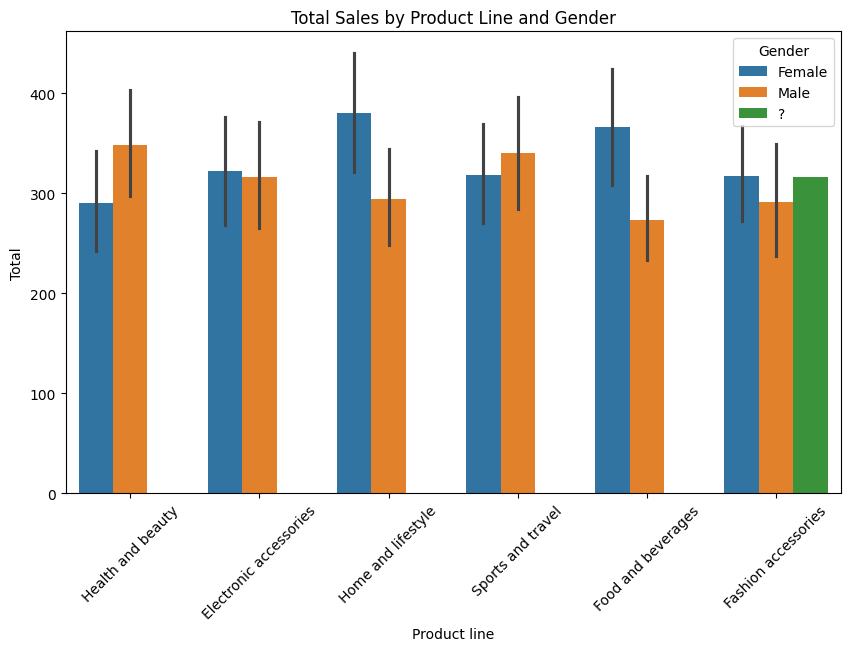

In [9]:
# Bivariate Analysis
print("\nBivariate Analysis:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Total')
plt.title("Boxplot of Total Sales by Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product line', y='Total', hue='Gender')
plt.title("Total Sales by Product Line and Gender")
plt.xticks(rotation=45)
plt.show()



Multivariate Analysis:


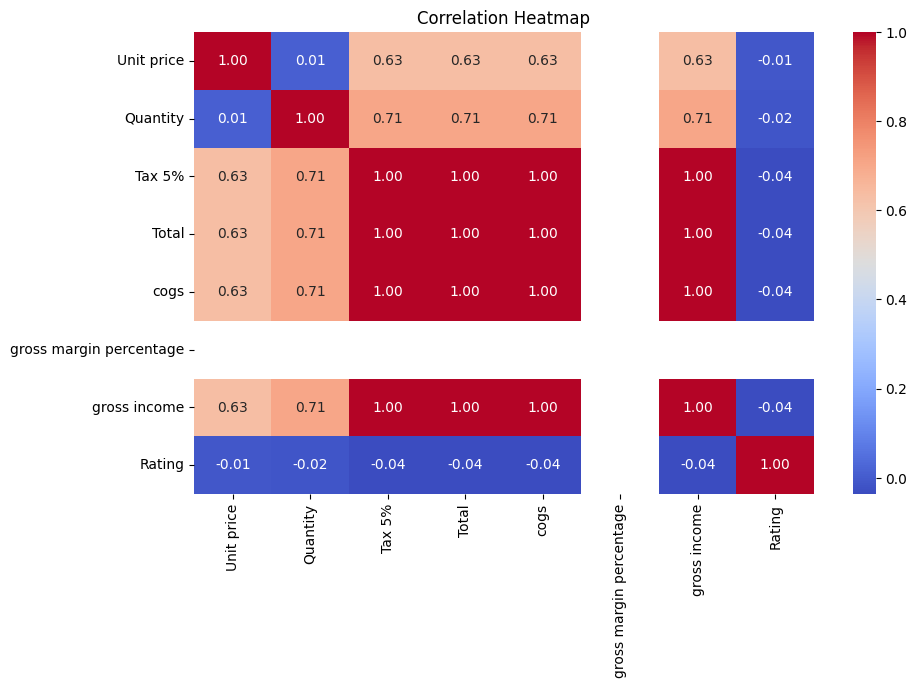

In [10]:
print("\nMultivariate Analysis:")
# Ensure numeric columns only for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Grouping
branches = df['Branch'].unique()
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-12-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


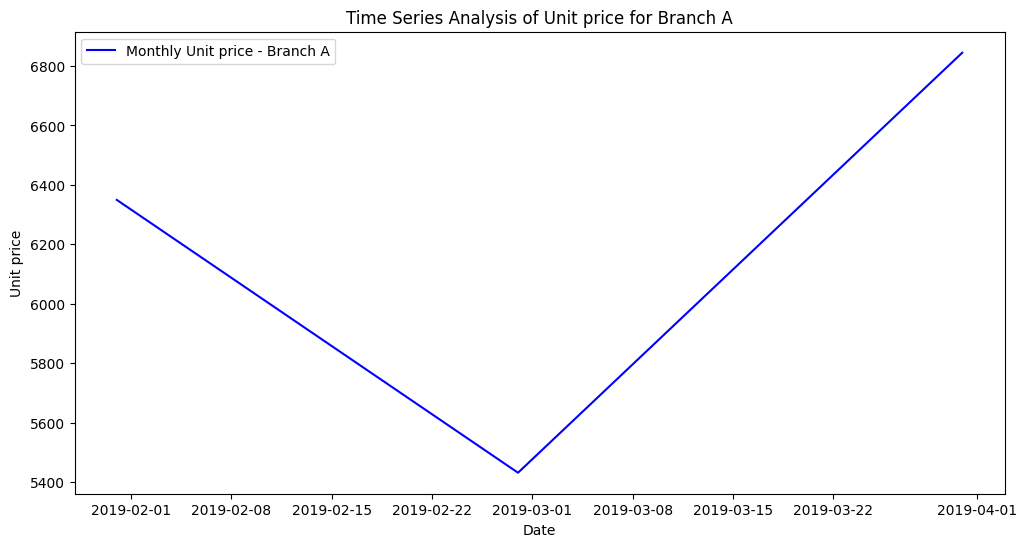

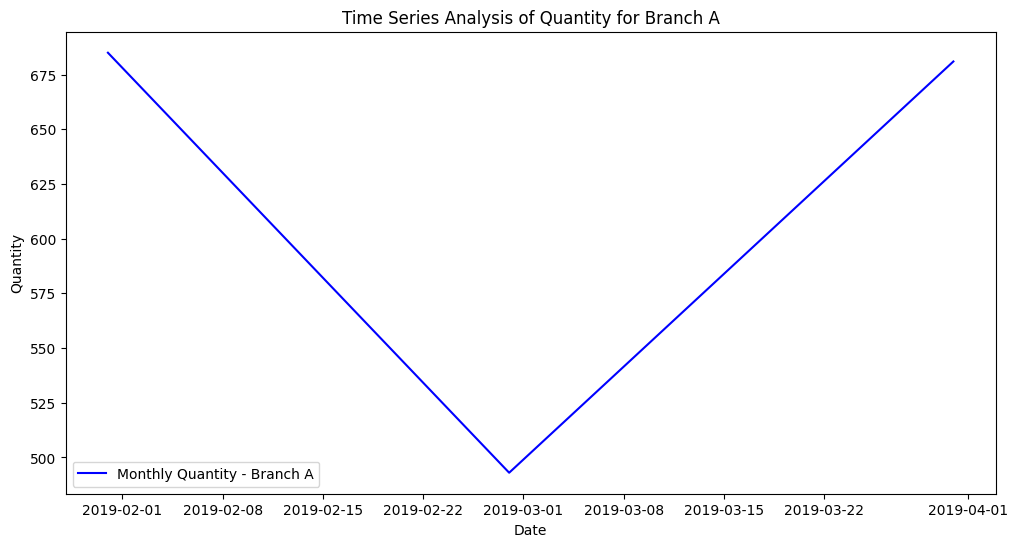

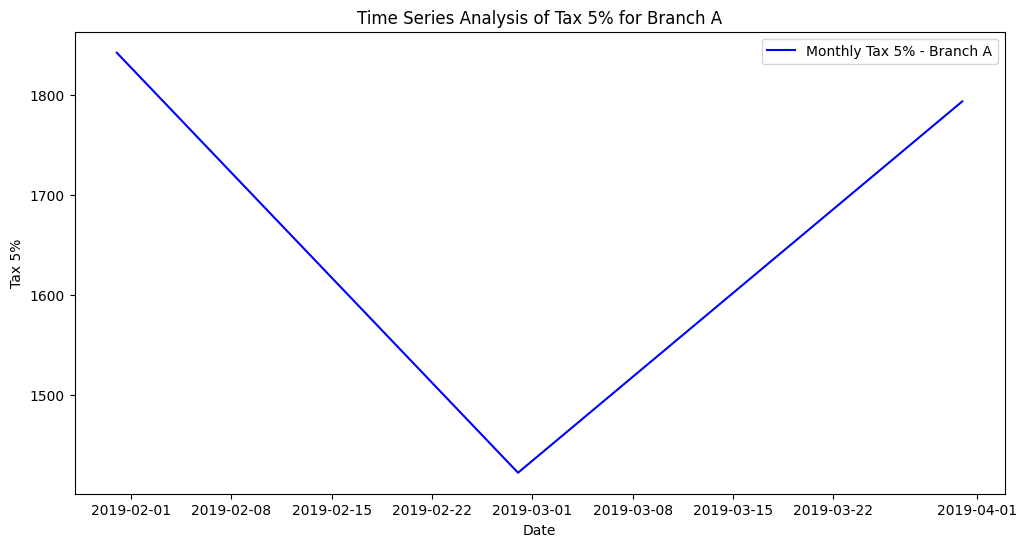

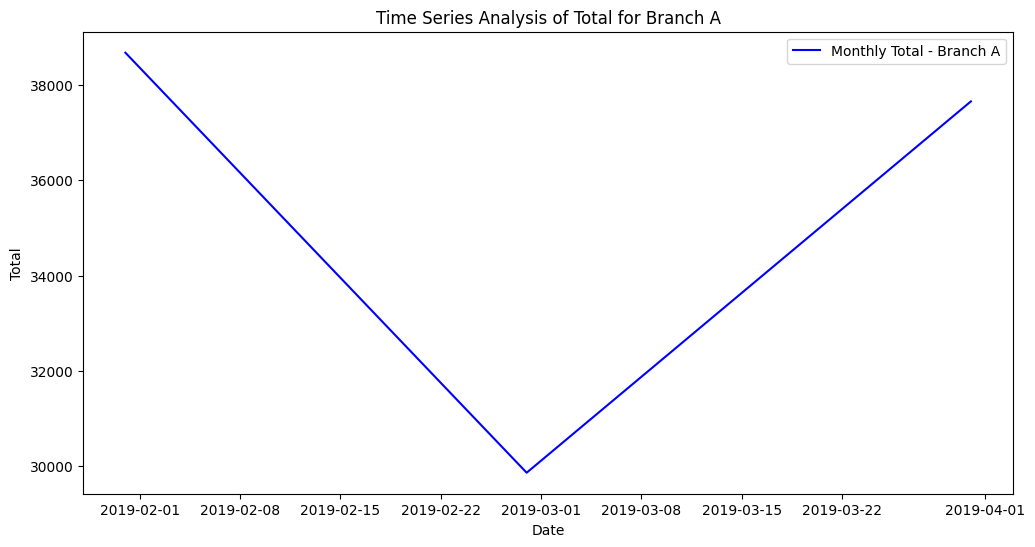

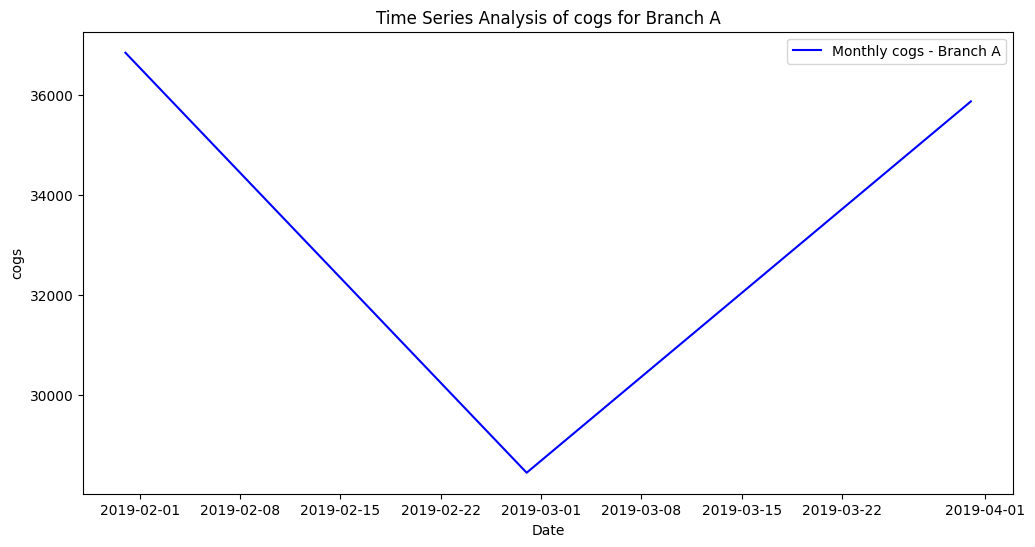

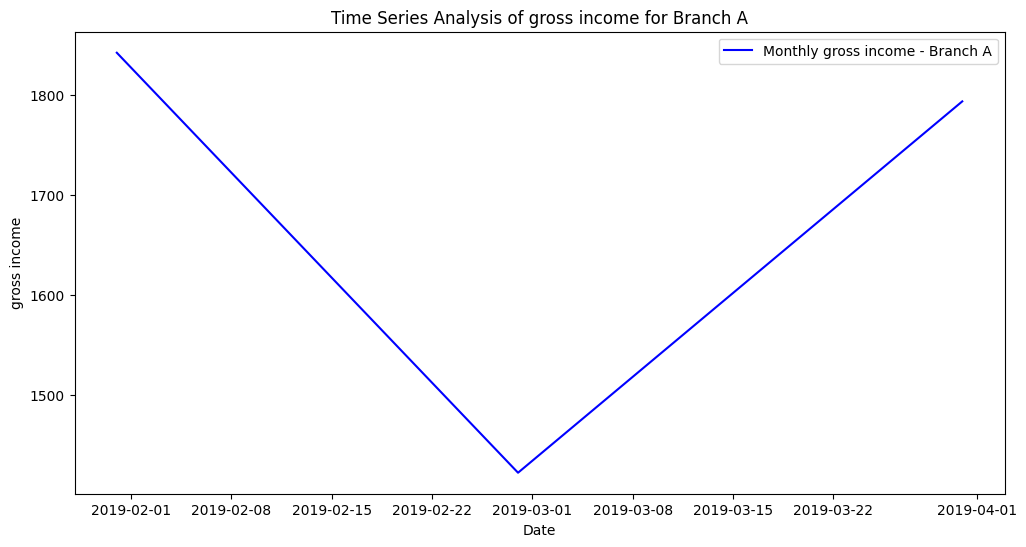

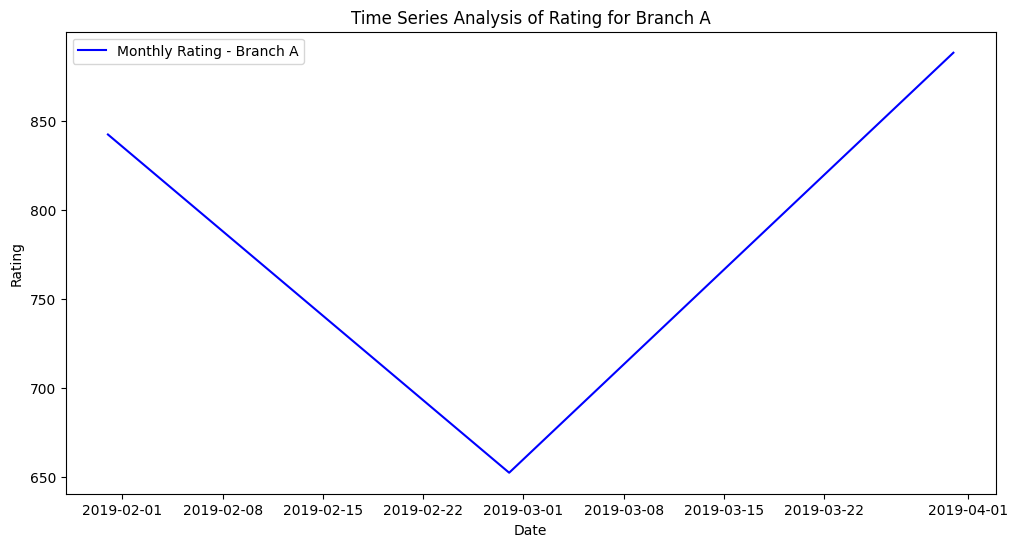

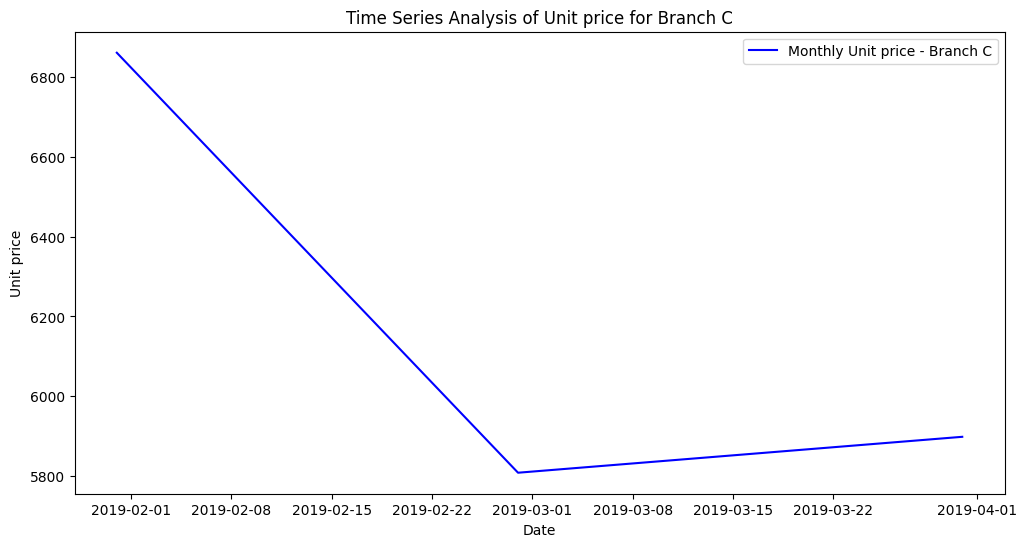

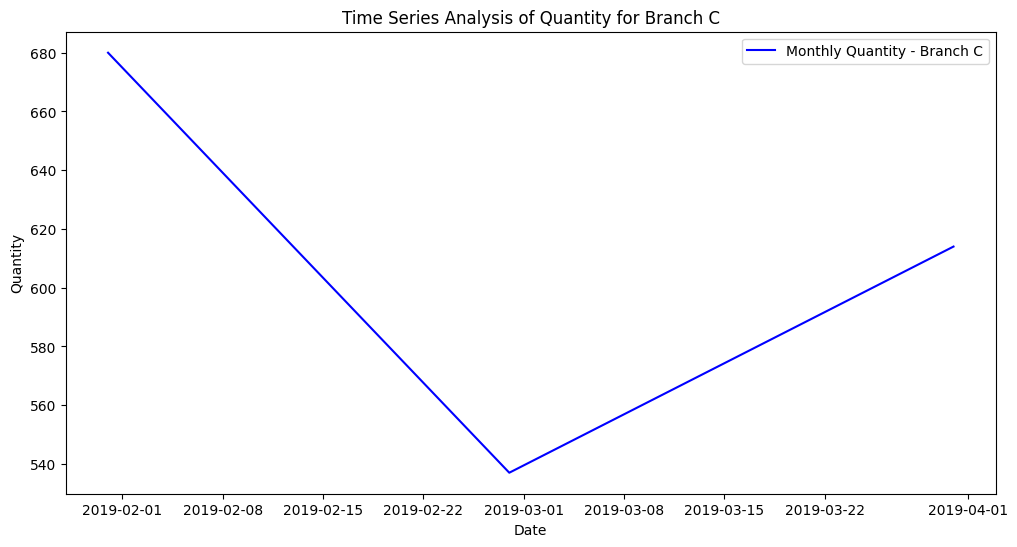

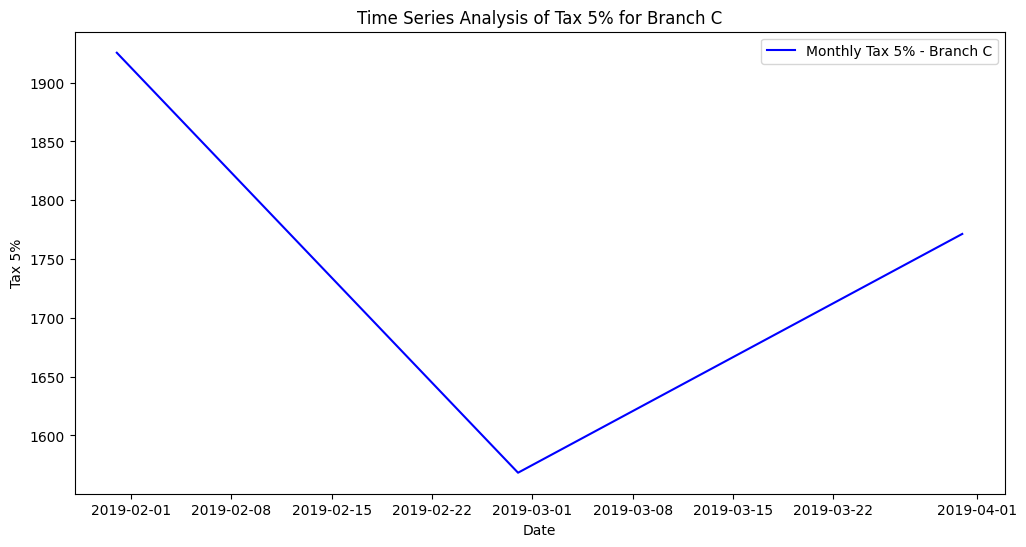

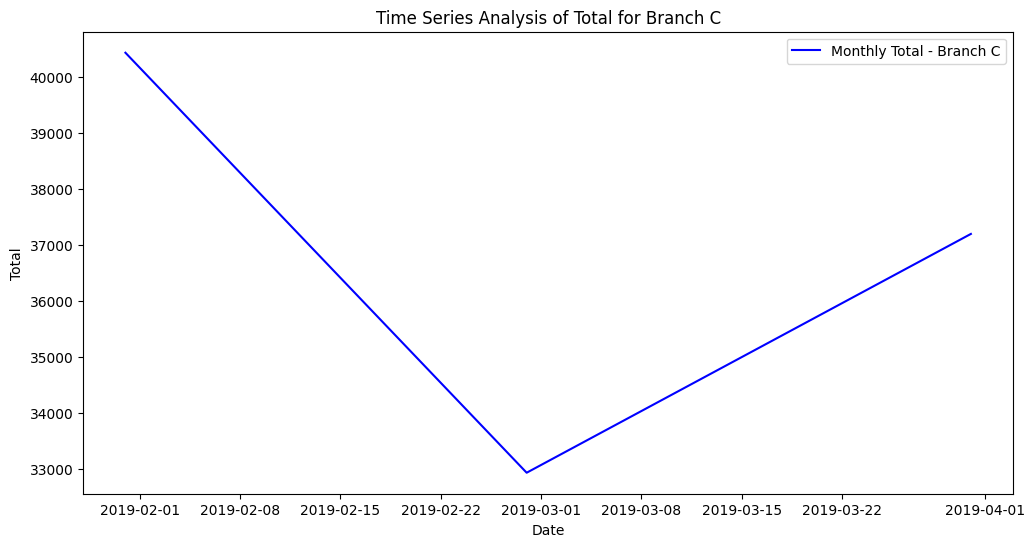

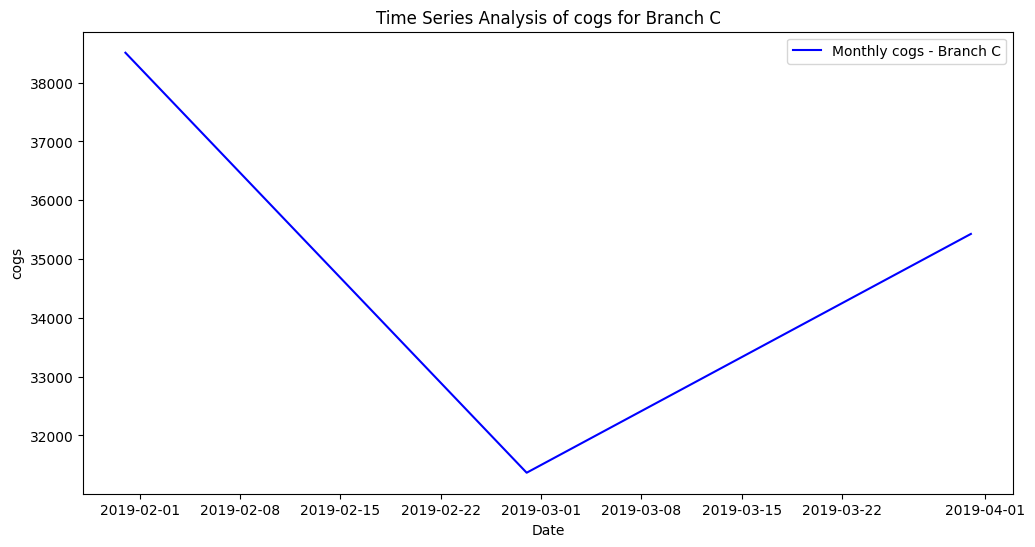

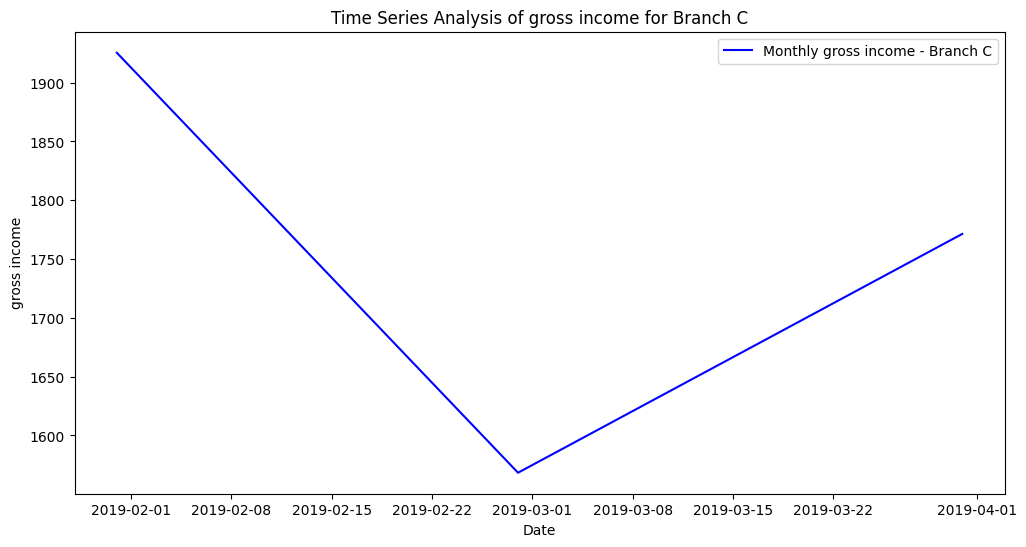

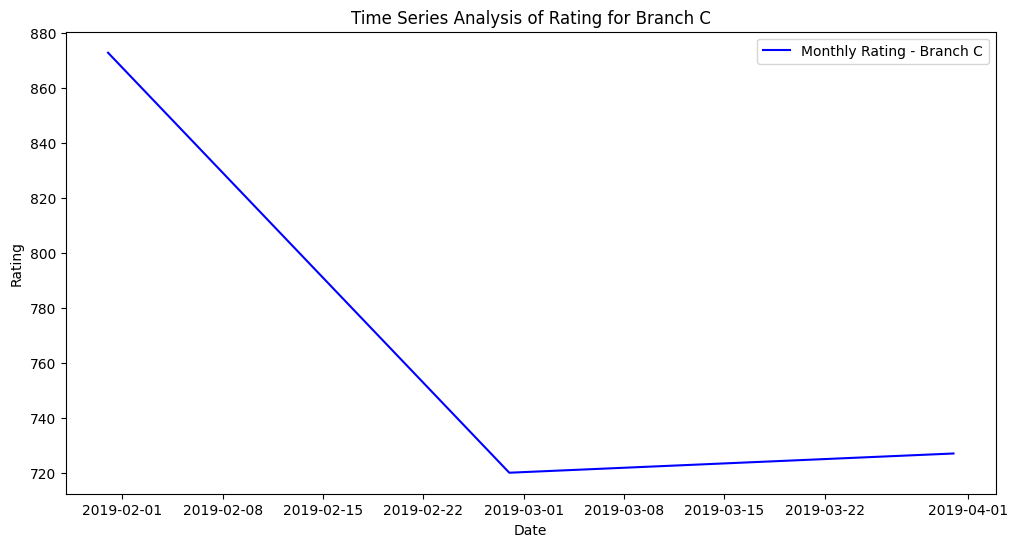

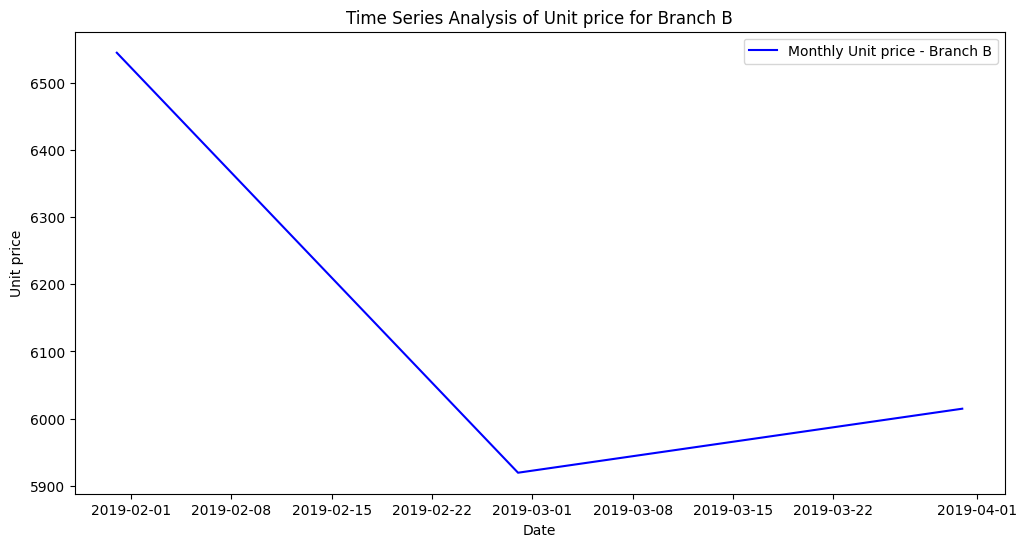

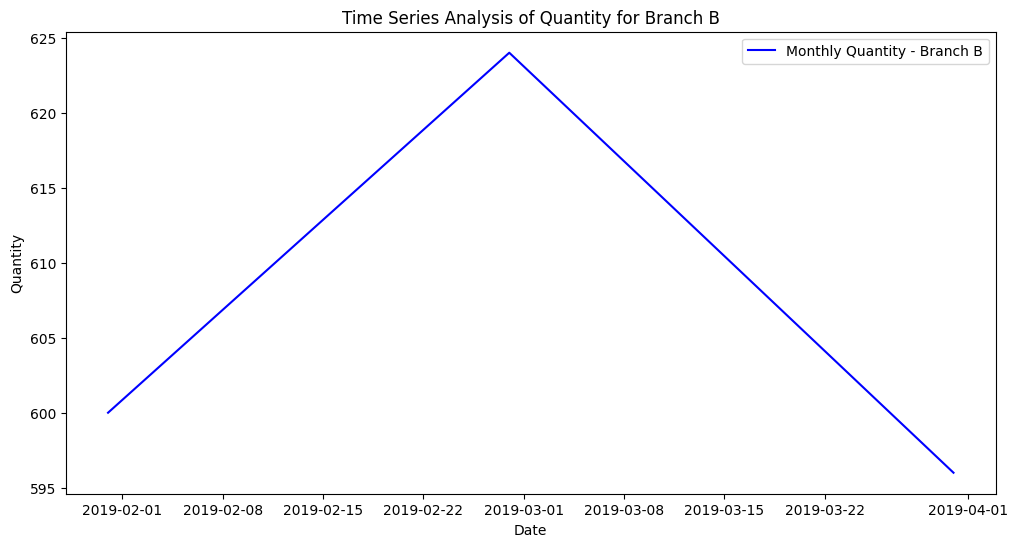

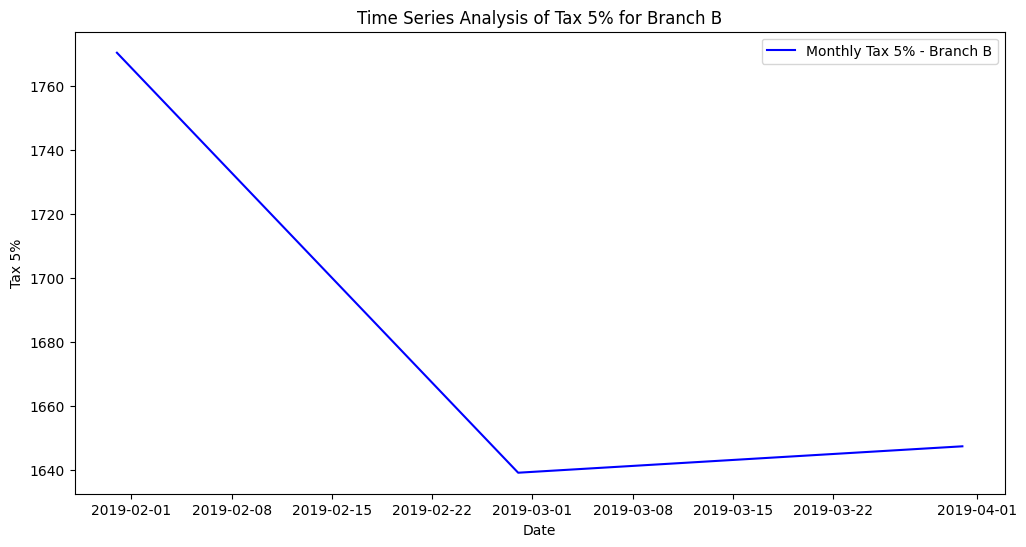

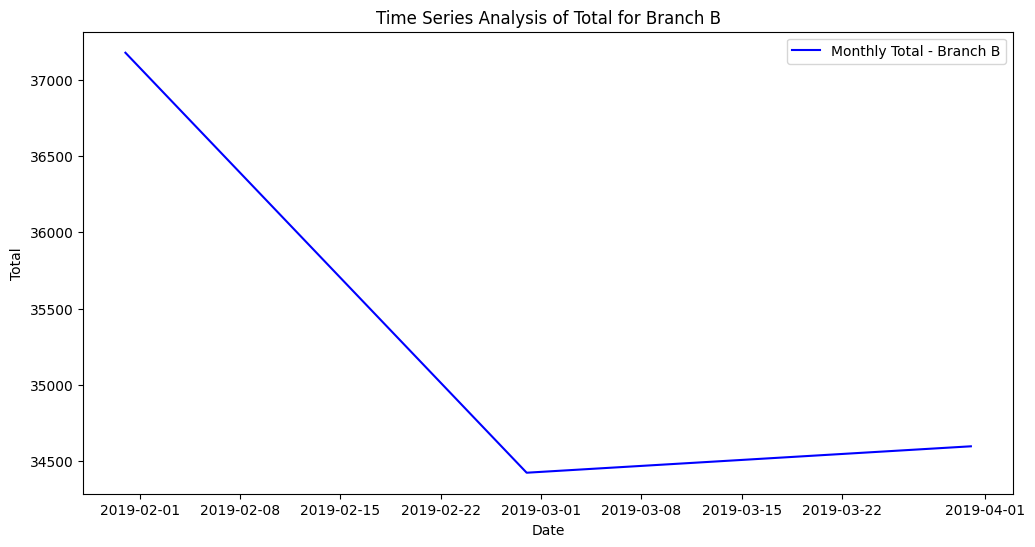

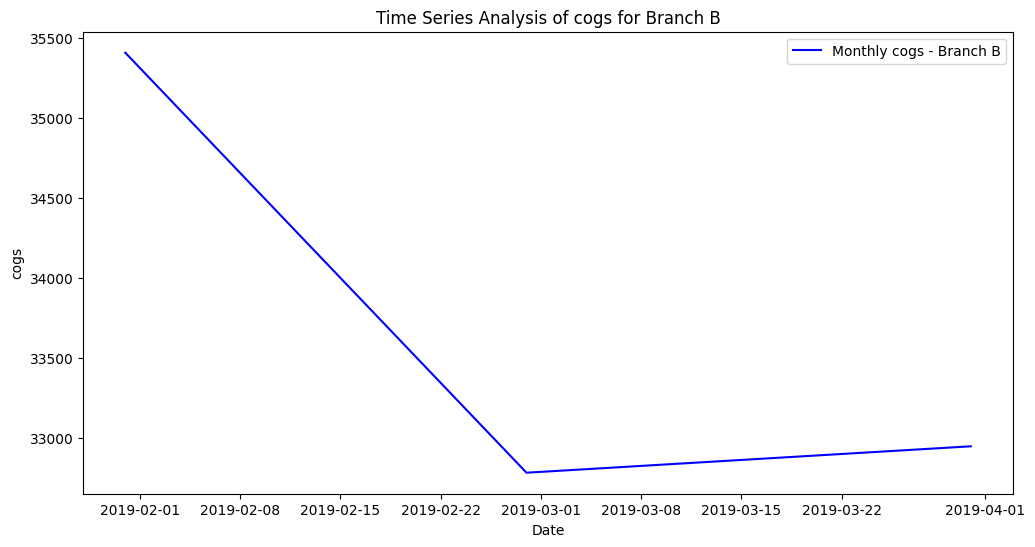

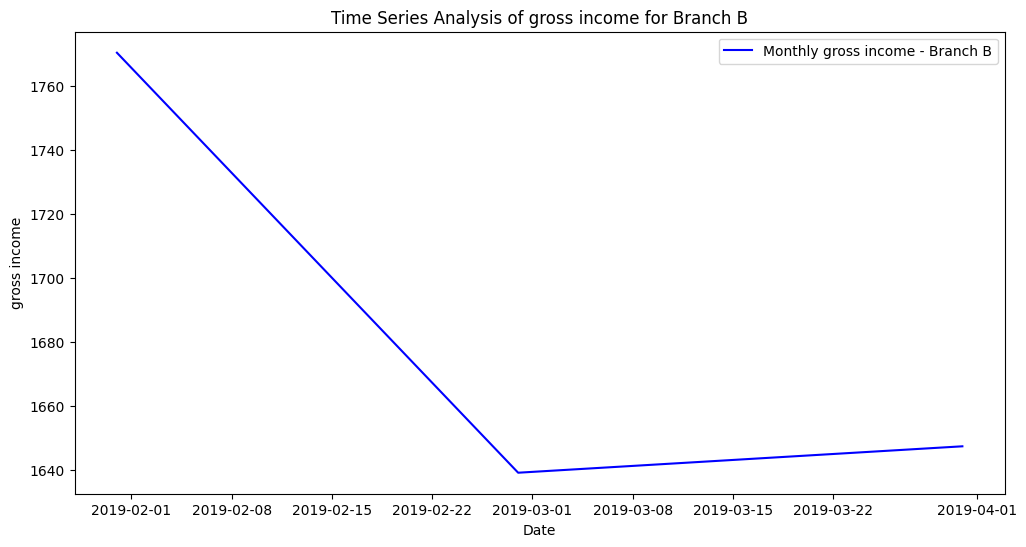

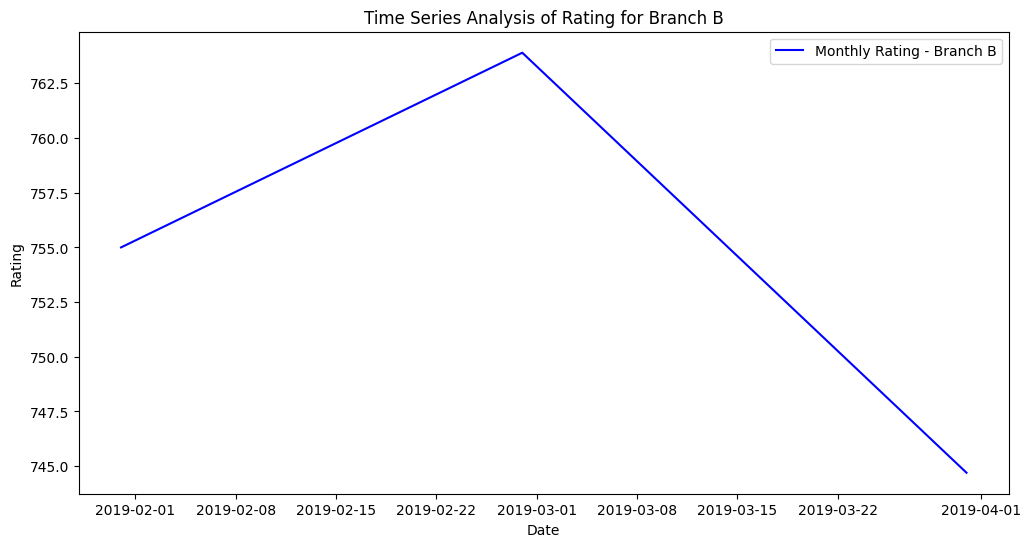

In [13]:
for branch in branches:
    branch_df = df[df['Branch'] == branch]
    branch_df = branch_df.set_index('Date').resample('ME').sum()
    for column in numeric_columns:
        # Plot time series
        plt.figure(figsize=(12,6))
        plt.plot(branch_df.index, branch_df[column], label=f'Monthly {column} - Branch {branch}', color='blue')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.title(f'Time Series Analysis of {column} for Branch {branch}')
        plt.legend()
        plt.show()

In [14]:
# 1D Statistical Data Analysis
# Measures of Central Tendency
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])


Mean:
 Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.973373
dtype: float64
Median:
 Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000
dtype: float64
Mode:
 Unit price                 83.770000
Quantity                   10.000000
Tax 5%                      4.154000
Total                      87.234000
cogs                       83.080000
gross margin percentage     4.761905
gross income                4.154000
Rating                      6.000000
Name: 0, dtype: float64


In [15]:
# Measures of Dispersion
print("Standard Deviation:\n", df.std(numeric_only=True))
print("Variance:\n", df.var(numeric_only=True))
print("Range:\n", df.max(numeric_only=True) - df.min(numeric_only=True))

Standard Deviation:
 Unit price                 2.649463e+01
Quantity                   2.923431e+00
Tax 5%                     1.170883e+01
Total                      2.458853e+02
cogs                       2.341765e+02
gross margin percentage    6.131501e-14
gross income               1.170883e+01
Rating                     1.719309e+00
dtype: float64
Variance:
 Unit price                 7.019653e+02
Quantity                   8.546446e+00
Tax 5%                     1.370966e+02
Total                      6.045960e+04
cogs                       5.483864e+04
gross margin percentage    3.759530e-27
gross income               1.370966e+02
Rating                     2.956024e+00
dtype: float64
Range:
 Unit price                   89.8800
Quantity                      9.0000
Tax 5%                       49.1415
Total                      1031.9715
cogs                        982.8300
gross margin percentage       0.0000
gross income                 49.1415
Rating                        6

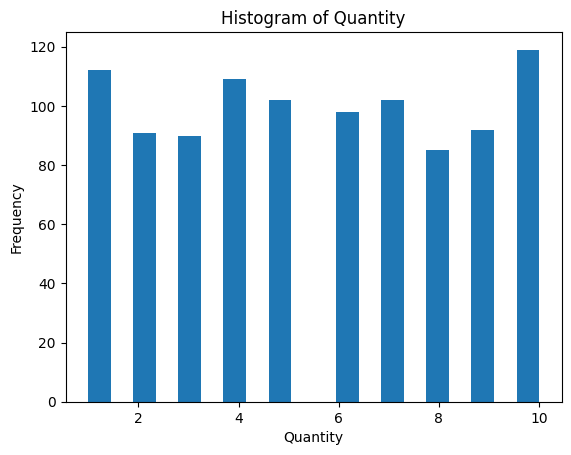

In [16]:
df['Quantity'].plot(kind='hist', bins=20, title='Histogram of Quantity')
plt.xlabel('Quantity')
plt.show()


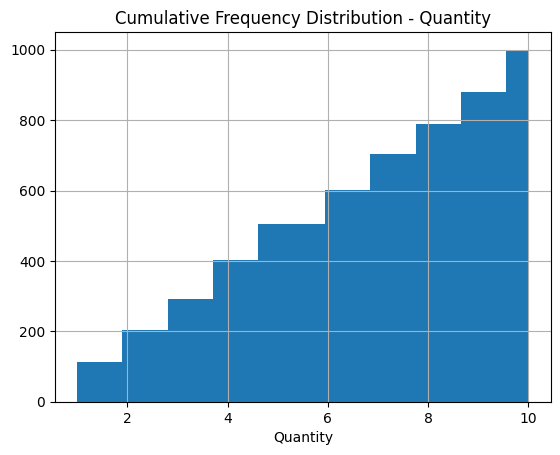

In [17]:
# Cumulative Frequency Distribution
df['Quantity'].hist(cumulative=True, bins=20)
plt.title("Cumulative Frequency Distribution - Quantity")
plt.xlabel("Quantity")
plt.show()

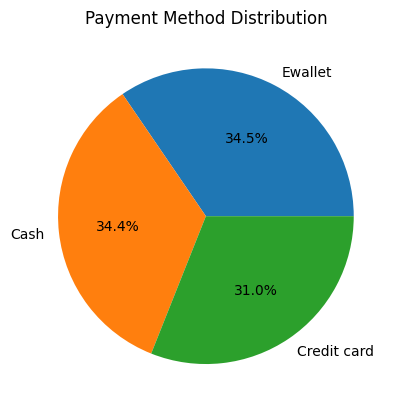

In [18]:
# Categorical Variable Analysis - Pie Plot
category_counts = df['Payment'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution')
plt.ylabel('')
plt.show()


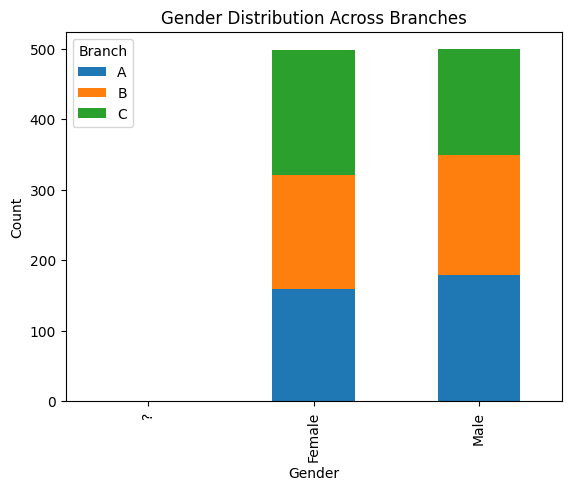

In [19]:
# Stacked Bar Plot
pd.crosstab(df['Gender'], df['Branch']).plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Branches')
plt.ylabel('Count')
plt.show()

In [20]:
# Two-Way Contingency Table
print(pd.crosstab(df['Gender'], df['Customer type']))

Customer type  >  ?  Member  Normal
Gender                             
?              0  0       1       0
Female         0  1     259     238
Male           1  0     240     258


In [21]:
# 3-Way Contingency Table
print(pd.crosstab([df['Branch'], df['Gender']], df['Customer type']))

Customer type  >  ?  Member  Normal
Branch Gender                      
A      ?       0  0       1       0
       Female  0  0      79      81
       Male    1  0      87      91
B      Female  0  0      85      76
       Male    0  0      80      90
C      Female  0  1      95      81
       Male    0  0      73      77


In [22]:
# Row & Column Profile
contingency = pd.crosstab(df['Gender'], df['Customer type'])
print("Row Profile:\n", contingency.div(contingency.sum(axis=1), axis=0))
print("Column Profile:\n", contingency.div(contingency.sum(axis=0), axis=1))


Row Profile:
 Customer type         >         ?    Member    Normal
Gender                                               
?              0.000000  0.000000  1.000000  0.000000
Female         0.000000  0.002008  0.520080  0.477912
Male           0.002004  0.000000  0.480962  0.517034
Column Profile:
 Customer type    >    ?  Member    Normal
Gender                                   
?              0.0  0.0   0.002  0.000000
Female         0.0  1.0   0.518  0.479839
Male           1.0  0.0   0.480  0.520161


In [23]:
# Relative Frequency
print("Relative Frequency:\n", contingency / contingency.to_numpy().sum())

Relative Frequency:
 Customer type         >         ?    Member    Normal
Gender                                               
?              0.000000  0.000000  0.001002  0.000000
Female         0.000000  0.001002  0.259519  0.238477
Male           0.001002  0.000000  0.240481  0.258517


In [26]:
# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-Square Test Result:\n", chi2, p)


Chi-Square Test Result:
 4.527911905687268 0.6056188662663946


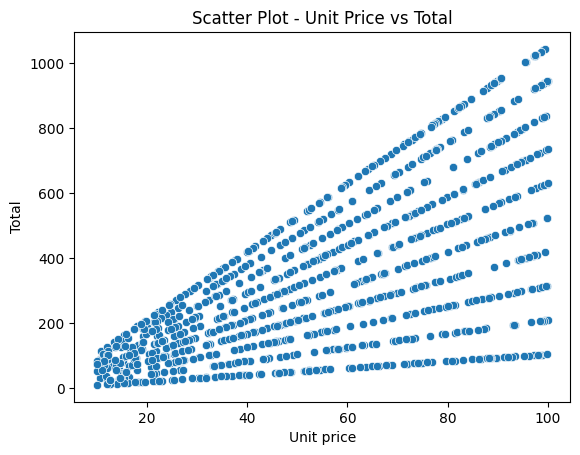

In [27]:
# Scatter Plot
sns.scatterplot(data=df, x='Unit price', y='Total')
plt.title('Scatter Plot - Unit Price vs Total')
plt.show()


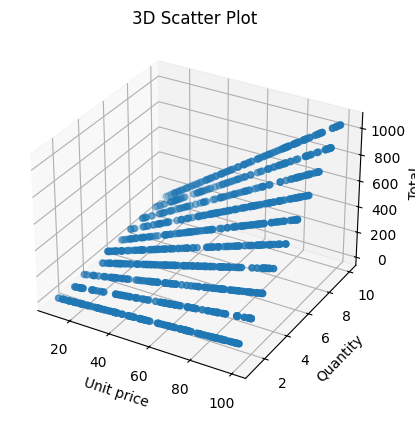

In [28]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Unit price'], df['Quantity'], df['Total'])
ax.set_xlabel('Unit price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Total')
plt.title('3D Scatter Plot')
plt.show()

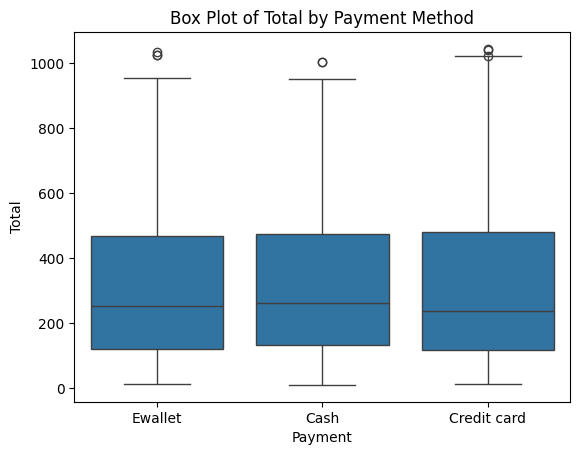

In [29]:
# 2D Box Plot
sns.boxplot(data=df, x='Payment', y='Total')
plt.title('Box Plot of Total by Payment Method')
plt.show()

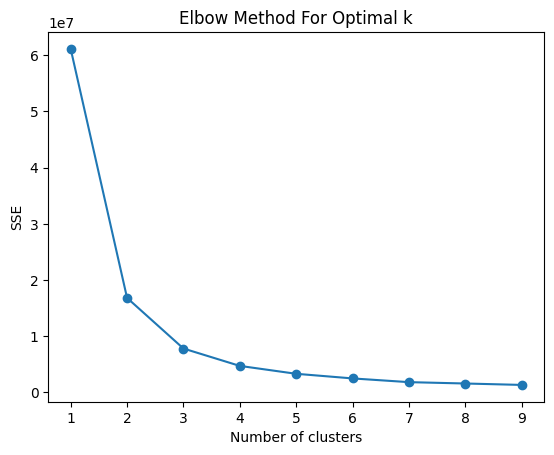

In [30]:
# Elbow Method
X = df[['Unit price', 'Quantity', 'Total']]
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

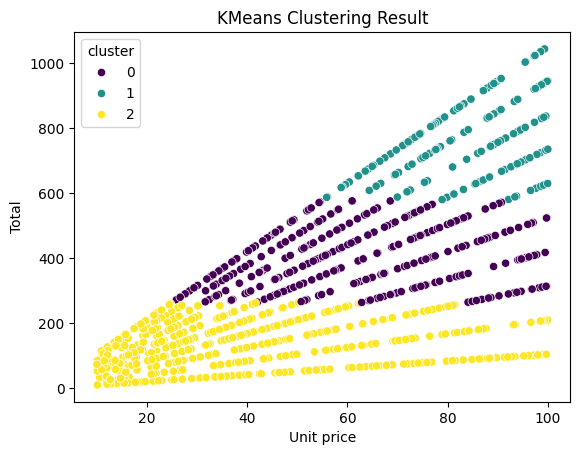

In [31]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=df, x='Unit price', y='Total', hue='cluster', palette='viridis')
plt.title('KMeans Clustering Result')
plt.show()


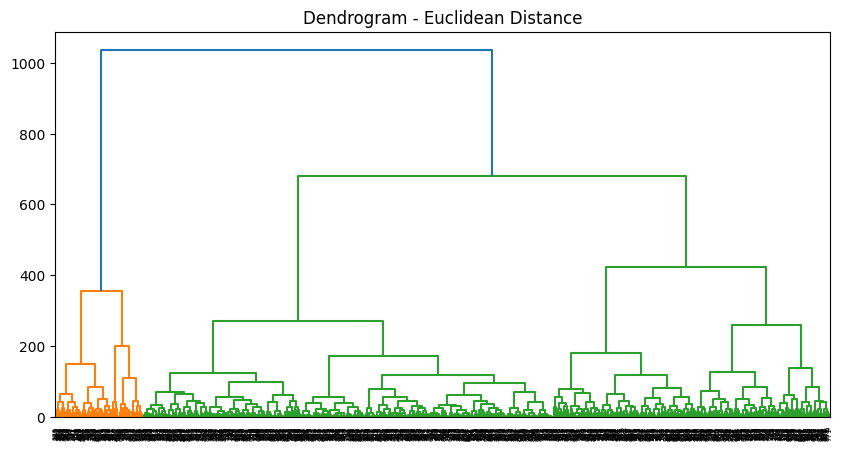

In [32]:
features = X.values

# Euclidean Distance
Z = linkage(features, method='complete', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram - Euclidean Distance')
plt.show()

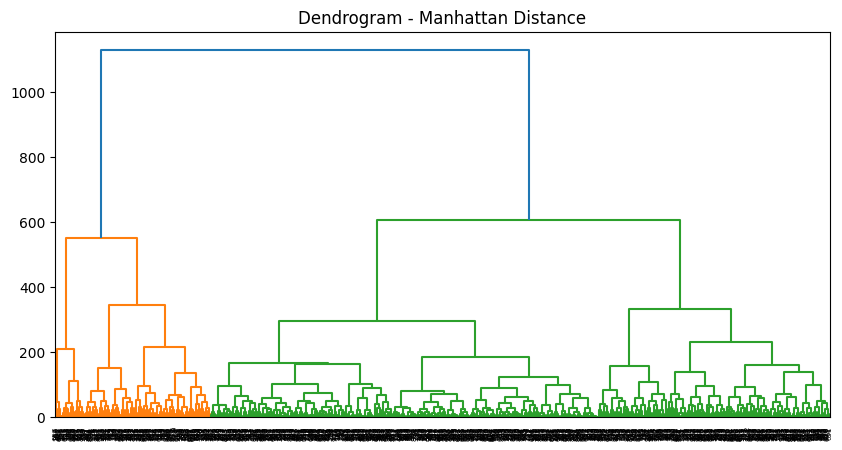

In [33]:
# Manhattan Distance
Z = linkage(features, method='complete', metric='cityblock')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram - Manhattan Distance')
plt.show()

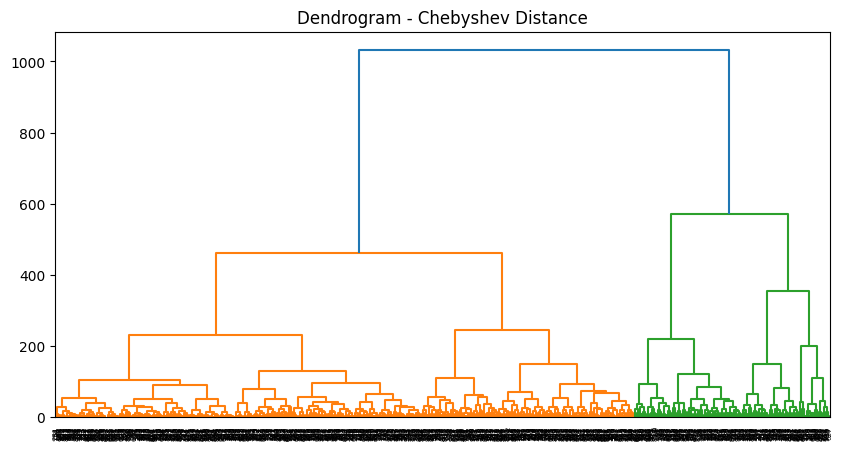

In [34]:
# Chebyshev Distance
Z = linkage(features, method='complete', metric='chebyshev')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram - Chebyshev Distance')
plt.show()

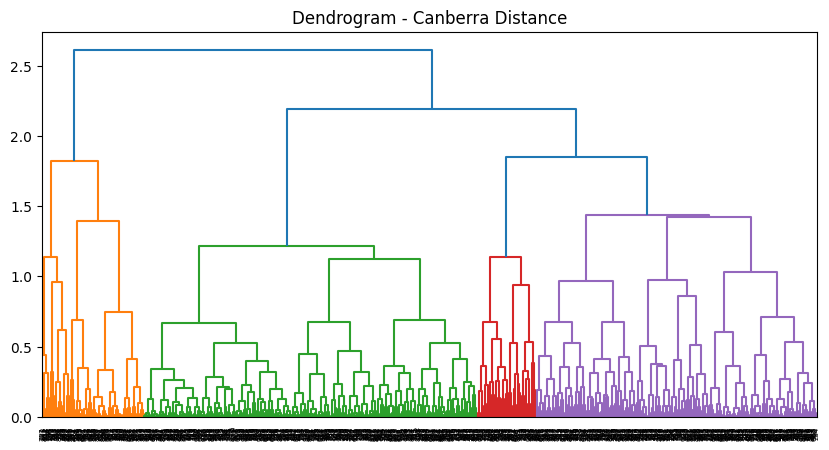

In [35]:
# Canberra Distance
Z = linkage(features, method='complete', metric='canberra')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram - Canberra Distance')
plt.show()

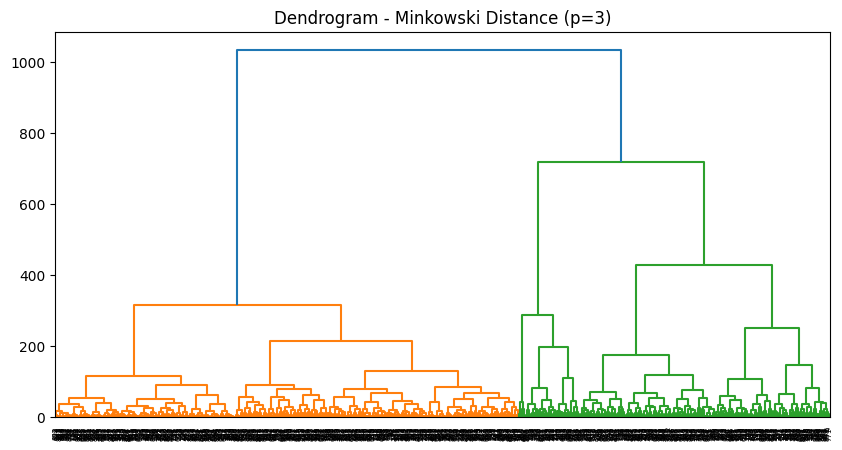

In [38]:
# Minkowski Distance (p=3)
dist_matrix = pdist(features, metric='minkowski', p=3)
Z = linkage(dist_matrix, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram - Minkowski Distance (p=3)')
plt.show()

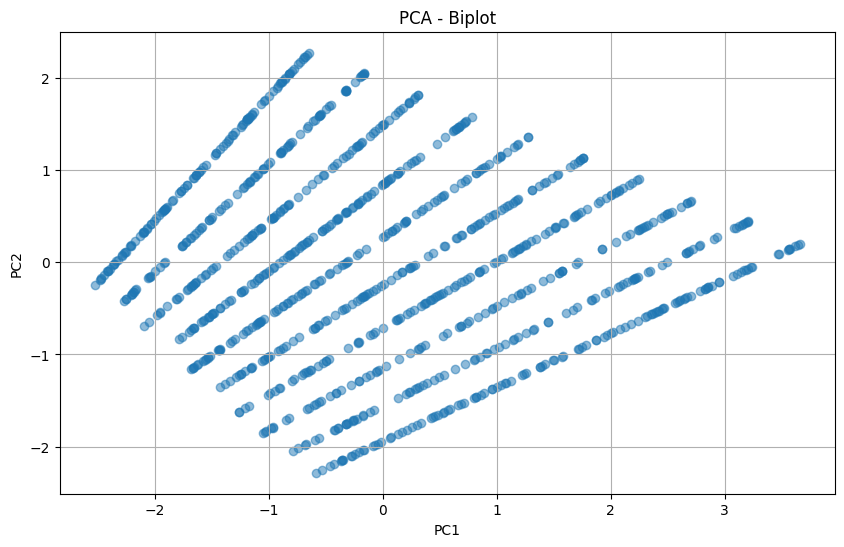

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA - Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [39]:
# Load & Prepare Data
X = df[['Unit price', 'Quantity']]
y = df['Total']

In [40]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:

# Simple Linear Regression
lr_simple = LinearRegression()
lr_simple.fit(X_train[['Unit price']], y_train)
print("Simple LR Coefficients:", lr_simple.coef_)

Simple LR Coefficients: [5.7535703]


In [42]:
# Multiple Linear Regression
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
print("Multiple LR Coefficients:", lr_multi.coef_)

Multiple LR Coefficients: [ 5.7979577  58.24305536]


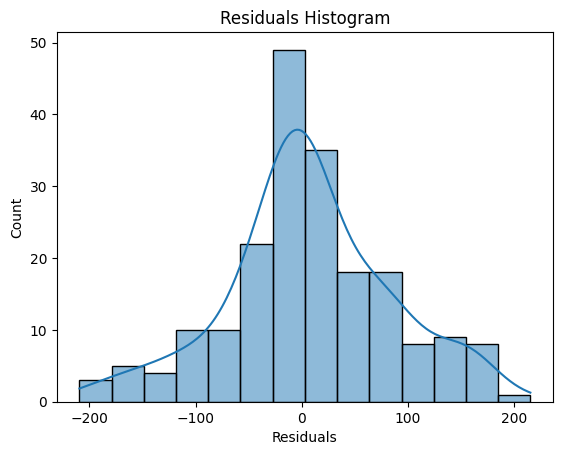

In [43]:
# Residual Analysis
predictions = lr_multi.predict(X_test)
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.show()